In [70]:
from importlib import reload

import src.visualizations.plots as plot

reload(plot)

<module 'src.visualizations.plots' from 'C:\\Users\\carlo\\PycharmProjects\\PythonProject\\PythonProject\\Deep-Learning-Weather-Forecasting\\src\\visualizations\\plots.py'>

In [71]:
import seaborn as sns

from src.data.make_dataset import load_raw_data, make_dataset
from src.models.build_model import model_cnn_bilstm
from src.models.evaluate import evaluate_model
from src.models.train import train_model
from src.preprocessing.clean import clean_columns
from src.visualizations.plots import plot_history_weather, plot_weather_samples, plot_prediction, plot_metric_evolution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sns.set_theme()

In [3]:
# Mostramos la correlación entre variables.
data = load_raw_data()
data.corr()

INFO:root:Dataset already present: C:\Users\carlo\PycharmProjects\PythonProject\PythonProject\Deep-Learning-Weather-Forecasting\data\raw\jena_climate_2009_2016.csv
INFO:root:Loading raw CSV: C:\Users\carlo\PycharmProjects\PythonProject\PythonProject\Deep-Learning-Weather-Forecasting\data\raw\jena_climate_2009_2016.csv


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


In [4]:
data = clean_columns(data)
data.describe()

INFO:root:Cleaning dataframe...
INFO:root:Fixing 18 invalid wind-speed values (<0).


,p_(mbar),T_(degC),rh_(%),sh_(g/kg),wv_(m/s),wd_(deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,76.008259,6.022408,2.130191,174.743738
std,8.358481,8.423365,16.476175,2.656139,1.542334,86.681693
min,913.600000,-23.010000,12.950000,0.500000,0.000000,0.000000
25%,984.200000,3.360000,65.210000,3.920000,0.990000,124.900000
50%,989.580000,9.420000,79.300000,5.590000,1.760000,198.100000
75%,994.720000,15.470000,89.400000,7.800000,2.860000,234.100000
max,1015.350000,37.280000,100.000000,18.130000,28.490000,360.000000


In [5]:
# Hiperparámetros
BATCH = 128
EPOCHS = 100
DOWNSAMPLE = '1h'
TEST_RATIO = 0.15
VAL_RATIO = 0.15
WINDOW_SIZE = 72
TARGET_SIZE = 24
UNITS = 32
DROPOUT_RATE = 0.1
SEED = 42

In [6]:
x_train, y_train, x_val, y_val, x_test, y_test, scaler = make_dataset(DOWNSAMPLE, TEST_RATIO, VAL_RATIO, WINDOW_SIZE, TARGET_SIZE)
input_shape = x_train.shape[1:]  # (window_size, num_features)
output_size = y_train.shape[1]  # horizonte

INFO:root:Loading raw dataset...
INFO:root:Dataset already present: C:\Users\carlo\PycharmProjects\PythonProject\PythonProject\Deep-Learning-Weather-Forecasting\data\raw\jena_climate_2009_2016.csv
INFO:root:Loading raw CSV: C:\Users\carlo\PycharmProjects\PythonProject\PythonProject\Deep-Learning-Weather-Forecasting\data\raw\jena_climate_2009_2016.csv
INFO:root:Cleaning columns...
INFO:root:Cleaning dataframe...
INFO:root:Fixing 18 invalid wind-speed values (<0).
INFO:root:Downsampling with rule: 1h
INFO:root:Creating splits...
INFO:root:Scaling splits...
INFO:root:Creating windows...
INFO:root:Dataset processed and saved in data/processed/


In [7]:
model = model_cnn_bilstm(UNITS, DROPOUT_RATE, input_shape, output_size)
model.summary()

Model: "CNN_BiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 72, 32)         │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 72, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 72, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,952 (113.09 KB)

 Trainable params: 28,888 (112.84 KB)

 Non-trainable params: 64 (256.00 B)

In [8]:
model, history = train_model(model, x_train, y_train, x_val, y_val, BATCH, EPOCHS)

Epoch 1/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - loss: 0.6581 - root_mean_squared_error: 0.8112 - val_loss: 0.7205 - val_root_mean_squared_error: 0.8488
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - loss: 0.2732 - root_mean_squared_error: 0.5227 - val_loss: 0.6111 - val_root_mean_squared_error: 0.7817
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - loss: 0.1985 - root_mean_squared_error: 0.4455 - val_loss: 0.3708 - val_root_mean_squared_error: 0.6089
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - loss: 0.1707 - root_mean_squared_error: 0.4131 - val_loss: 0.3244 - val_root_mean_squared_error: 0.5695
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - loss: 0.1574 - root_mean_squared_error: 0.3968 - val_loss: 0.3063 - val_root_mean_squared_error: 0.5535
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - loss: 0.1477 - root_mean_squared_error: 0.3844 - val_loss: 0.2968 - val_root_mean_squared_error: 0.5448
Epoch 7/100
383/383 ━━━━━━━━━━━━━━

In [9]:
results = evaluate_model(model, x_test, y_test, scaler, data.columns)
print("\n============ MÉTRICAS ============")
print(f"Test Loss:   {results['test_loss']:.4f}")
print(f"Test RMSE:   {results['test_rmse']:.4f}")
print(f"RMSE Global: {results['rmse_global']:.4f}")
print(f"MAE Global:  {results['mae_global']:.4f}")
print(f"Corr:        {results['corr_global']:.4f}")


============ MÉTRICAS ============
Test Loss:   0.1806
Test RMSE:   0.4250
RMSE Global: 3.6739
MAE Global:  2.8813
Corr:        0.9140


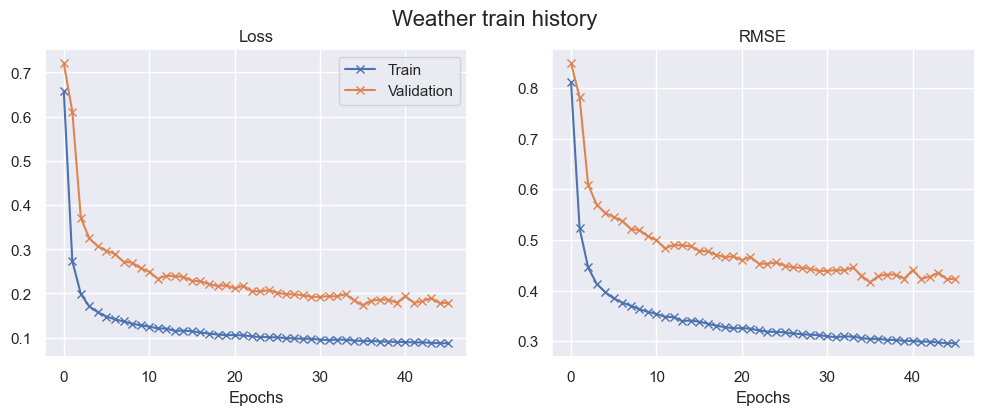

In [38]:
# Mostramos la evolución del entrenamiento.
plot_history_weather(history)

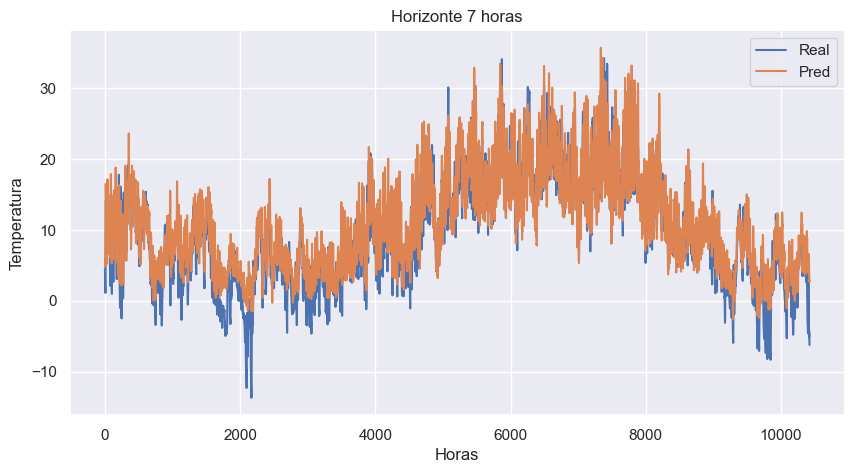

In [72]:
plot_prediction(results["y_test_unscaled"], results["y_pred_unscaled"], SEED)

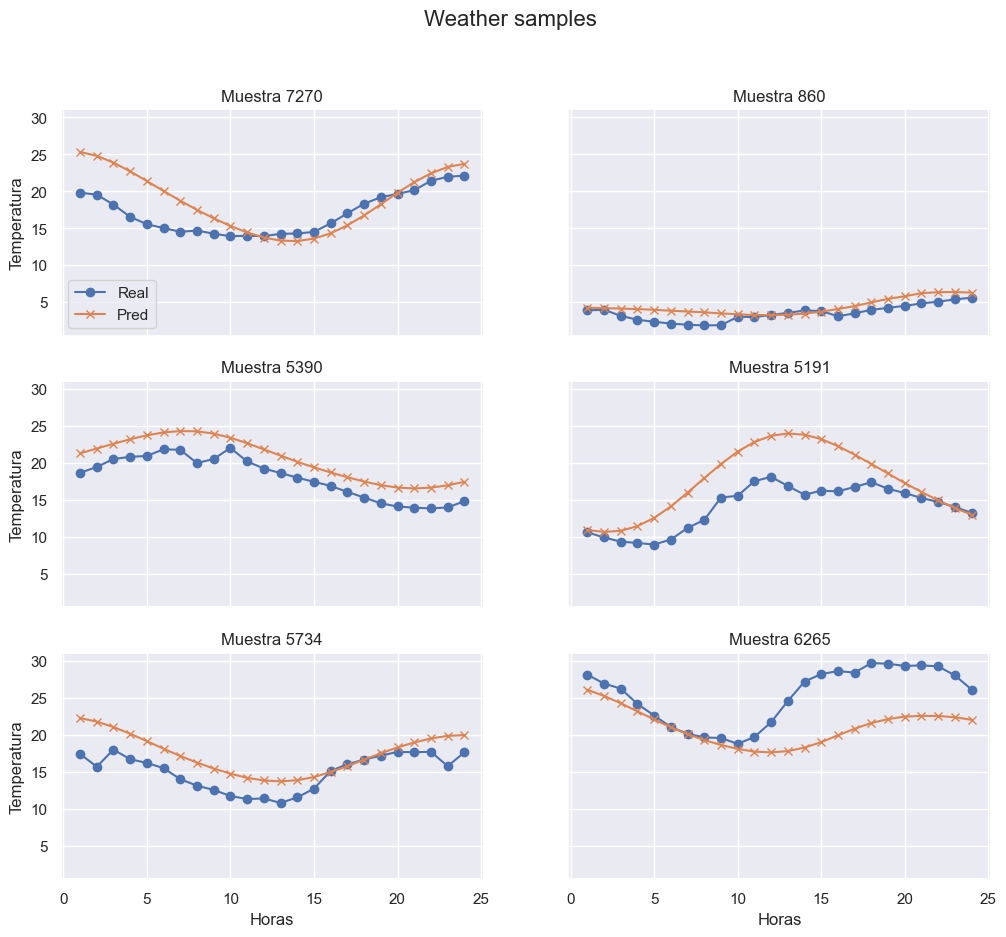

In [66]:
# Comparamos muestras reales aleatorias con sus predicciones.
plot_weather_samples(results["y_test_unscaled"], results["y_pred_unscaled"], SEED)

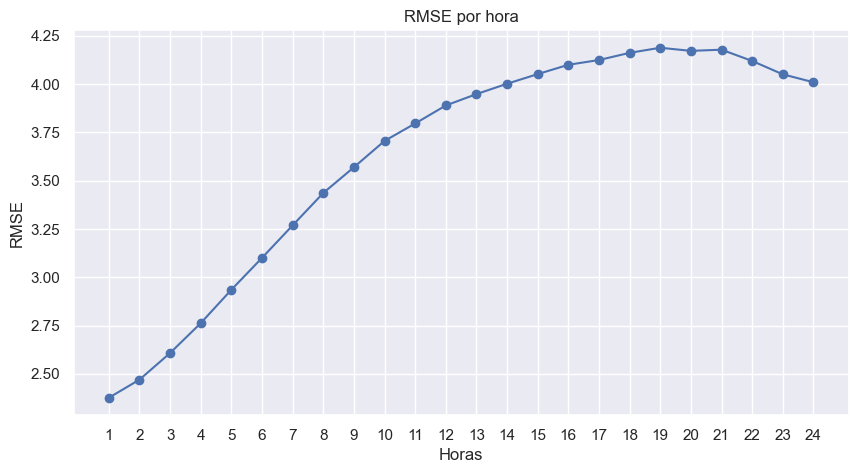

In [21]:
# Mostramos evolución del RMSE.
plot_metric_evolution(results["rmse_h"], 'RMSE')

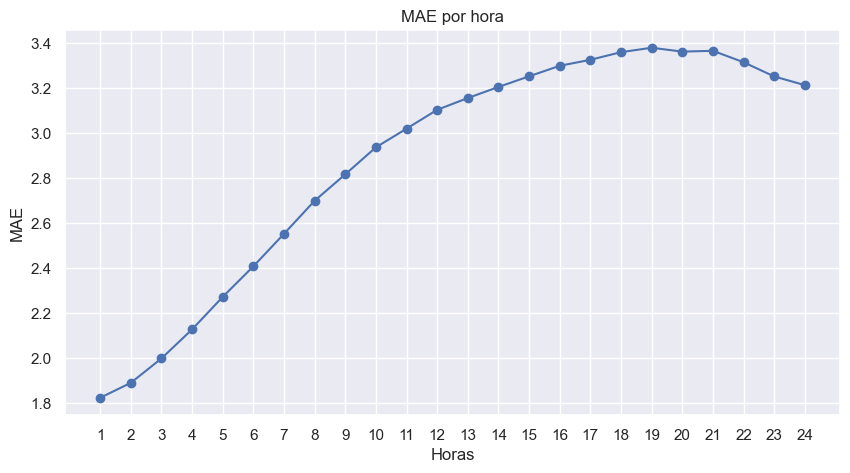

In [22]:
# Mostramos evolución del MAE.
plot_metric_evolution(results["mae_h"], "MAE")